In [69]:
import json

def get_info_by_id(response_data, id):

    # Find the responses for the given ID
    responses = []
    for item in response_data:
        if item['source_id'] == str(id) and 'labels' in item and item['labels']:
            response = {
                'model': item['model'],
                'response': item['response'],
                'labels': item['labels']
            }
            responses.append(response)

    return responses

# Read the source_info.jsonl file
with open('source_info.jsonl') as f:
    source_data = [json.loads(line) for line in f]

# Read the response.jsonl file
with open('response.jsonl') as f:
    response_data = [json.loads(line) for line in f]


In [93]:
# print keys in the source_data
print("Keys in the source_data")
for key in source_data[0].keys():
    print(key)

# print keys in the response_data
print("\nKeys in the response_data")
for key in response_data[0].keys():
    print(key)

# find a source data that has labels that's not empty
for item in response_data:
    if 'labels' in item and item['labels']:
        # print keys of label item
        print("\nKeys in the label item")   
        for key in item['labels'][0].keys():
            print(key)
        break

Keys in the source_data
source_id
task_type
source
source_info
prompt

Keys in the response_data
id
source_id
model
temperature
labels
split
quality
response
{'start': 636, 'end': 653, 'text': 'February 7, 2022.', 'meta': 'EVIDENT CONFLICT\nOriginal: February 7 (1945)\nGenerated: February 7, 2022', 'label_type': 'Evident Conflict', 'implicit_true': False, 'due_to_null': False}

Keys in the label item
start
end
text
meta
label_type
implicit_true
due_to_null


  0%|          | 0/2965 [00:00<?, ?it/s]

  0%|          | 0/2965 [00:00<?, ?it/s]

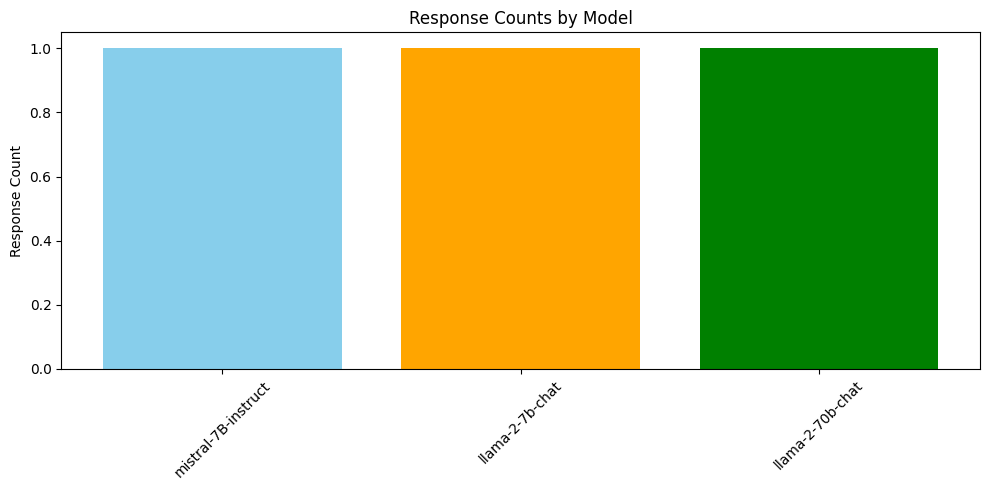

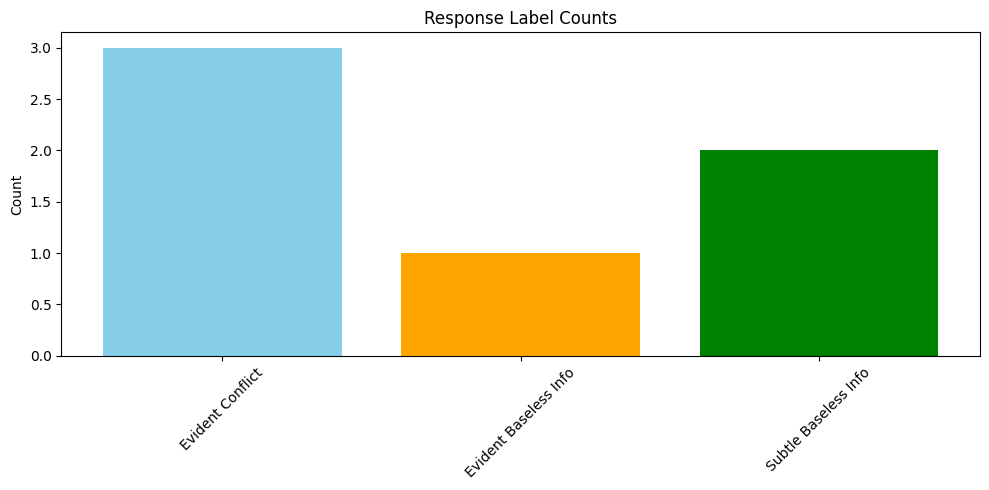

In [131]:
from tqdm import tqdm
from IPython.display import display, HTML
# make a matplot lib graph of the counts and then add it to an html block
import matplotlib.pyplot as plt

# Define the background colors for each label type
label_bg_colors = {
    'Evident Conflict': '#FF0000',  # Red
    'Evident Baseless Info': '#00FF00',  # Green
    'Subtle Baseless Info': '#0000FF',  # Blue
    'Subtle Conflict': '#FFFF00'  # Yellow
}

# foreground colors
label_colors = {
    'Evident Conflict': '#FFFFFF',  # White
    'Evident Baseless Info': '#000000',  # Black
    'Subtle Baseless Info': '#FFFFFF',  # Black
    'Subtle Conflict': '#000000'  # Black
}

# Create dictionaries to store the counts
response_counts_by_model = {}
response_label_counts = {}

total = 0
max = 10000

# Clear the output file
with open('output.html', 'w', encoding='utf-8') as f:
    f.write('')

# Use tqdm to iterate over source_data with a progress bar
for source_info in tqdm(source_data):
    id = source_info['source_id']
    responses = get_info_by_id(response_data, id)

    if responses:
        html = ''
        prompt = source_info['prompt']
        html += f'<h2>ID: {id}</h2>'
        html += source_info['prompt'] + '<br>'
        for item in responses:
            # Track the count of responses by model
            model = item['model']
            html += f'<h3>{model}</h3>'
            if model in response_counts_by_model:
                response_counts_by_model[model] += 1
            else:
                response_counts_by_model[model] = 1

            # Track the count of each response meta string
            response_text = item['response']
            for label in item['labels']:
                label_type = label['label_type']
                if label_type in response_label_counts:
                    response_label_counts[label_type] += 1
                else:
                    response_label_counts[label_type] = 1

                # Replace the label text with highlighted text using the corresponding background color                   
                highlighted_text = f'<span style="background-color: {label_bg_colors[label_type]}; color: {label_colors[label_type]}; cursor: pointer;" title="{label["meta"]}">{label["text"]}</span>'
                response_text = response_text.replace(label["text"], highlighted_text)

            html += response_text + '<br>'

        total += 1
        if total < max:
            # add to output file
            with open('output.html', 'a', encoding='utf-8') as f:
                f.write(html) 
            display(HTML(html))

# Create a bar chart of the response counts by model
# Create a list of colors for each model
model_colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Create a bar chart of the response counts by model with different colors
plt.figure(figsize=(10, 5))
plt.bar(response_counts_by_model.keys(), response_counts_by_model.values(), color=model_colors)
plt.ylabel('Response Count')
plt.title('Response Counts by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('response_counts_by_model.png')

# Create an HTML block with the bar chart
html = '<h2>Response Counts by Model</h2>'
html += '<img src="response_counts_by_model.png" alt="Response Counts by Model">'
html += '<br>'


# add it to the front of the output file
with open('output.html', 'r', encoding='utf-8') as f:
    contents = f.read()
with open('output.html', 'w', encoding='utf-8') as f:
    f.write
    f.write(html)
    f.write(contents)

# create a matplot lib chart of the counts
plt.figure(figsize=(10, 5))
plt.bar(response_label_counts.keys(), response_label_counts.values(), color=model_colors)
plt.ylabel('Count')
plt.title('Response Label Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('response_label_counts.png')

# Create an HTML block with the bar chart
html = '<h2>Response Label Counts</h2>'
html += '<img src="response_label_counts.png" alt="Response Label Counts">'
html += '<br>'

# add it to the front of the output file
with open('output.html', 'r', encoding='utf-8') as f:
    contents = f.read()
with open('output.html', 'w', encoding='utf-8') as f:
    f.write
    f.write(html)
    f.write(contents)


